## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#b51800; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #b51800">Rendering Initialization</p>

In [108]:
!wget https://raw.githubusercontent.com/JoseCaliz/dotfiles/main/css/vs_gruvbox.css -O CSS.css -q
    
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#b51800; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #b51800">Standard Imports</p>

In [109]:
# !pip install colorama geopandas

In [110]:
import os
import datetime
import math
import numpy as np
import pandas as pd
from os.path import dirname, join

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from pandas.io.formats.style import Styler

# Surpress warnings
import warnings
warnings.filterwarnings('ignore')

tqdm.pandas()

rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
gld = Style.BRIGHT + Fore.YELLOW
grn = Style.BRIGHT + Fore.GREEN
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#b51800; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #b51800">Data</p>

**Data on castle-doctrine statutes and violent crime**. This data looks at the impact of castle-doctrine statutes on violent crime. Data from the FBI Uniform Crime Reports Summary files are combined with information on castle-doctrine/stand-your-ground law impementation in different states.

Link to download the dataset: [link](https://github.com/NickCH-K/causaldata/tree/main/Python/causaldata/castle) \
Link to the original paper, by Cheng, and Hoekstra. 2013 [1]: [link](https://www.jstor.org/stable/23799103)

**Number of observations**: 550  
**Number of variables**: 139  

**Variables name definitions:**

- `year` - Year
- `post` - Post-treatment indicator
- `sid` - State ID
- `robbery_gun_r` - Region-quarter fixed effects
- `jhcitizen_c` - Justifiable homicide by private citizen count
- `jhpolice_c` - Justifiable homicide by police count
- `homicide` - Homicide count per 100,000 state population
- `robbery` - Region-quarter fixed effects
- `assault` - Aggravated assault count per 100,000 state population
- `burglary` - Burglary count per 100,000 state population
- `larceny` - Larceny count per 100,000 state population
- `motor` - Motor vehicle theft count per 100,000 state population
- `murder` - Murder count per 100,000 state population
- `unemployrt` - Unemployment rate
- `blackm_15_24` - % of black male aged 15-24
- `whitem_15_24` - % of white male aged 15-24
- `blackm_25_44` - % of black male aged 25-44
- `whitem_25_44` - % of white male aged 25-44
- `poverty` - Poverty rate
- `r20001` through `r20104` - Region-quarter fixed effects
- `trend_1` through `trend_51` - State linear time trends
- `l_homicide` - Logged crime rate
- `l_larceny` - Logged crime rate
- `l_motor` - Logged crime rate
- `l_police` - Logged police presence
- `l_income` - Logged income
- `l_prisoner` - Logged number of prisoners
- `l_lagprisoner` - Lagged log prisoners
- `l_exp_subsidy` - Logged subsidy spending
- `l_exp_pubwelfare` - Logged public welfare spending
- `lead1` through `lead9` and `lag0` through `lag5` - Indicators of how many time periods until/since treatment
- `popwt` - Population weight

--- 
[1] Cheng, Cheng, and Mark Hoekstra. 2013. “Does Strengthening Self-Defense Law Deter Crime or Escalate Violence? Evidence from Expansions to Castle Doctrine.” Journal of Human Resources 48 (3): 821–54.


In [111]:
DIR_PATH = dirname(os.path.abspath(''))
DATA_PATH = join(DIR_PATH, 'data')
castle = pd.read_stata(join(DATA_PATH, 'castle.dta'))

In [112]:
castle.head(11)

,year,sid,robbery_gun_r,jhcitizen_c,jhpolice_c,homicide,robbery,assault,burglary,larceny,...,lead7,lead8,lead9,lag0,lag1,lag2,lag3,lag4,lag5,popwt
0,2000,1,0.210803,1,0,7.593978,131.613571,325.617798,930.920166,2940.623779,...,0,0,0,0,0,0,0,0,0,4499293.0
1,2001,1,0.214362,2,0,8.713443,128.379593,281.635040,934.384583,2758.689941,...,0,0,0,0,0,0,0,0,0,4499293.0
2,2002,1,0.424019,3,2,6.933288,136.423309,274.631409,974.275696,2835.829102,...,0,0,0,0,0,0,0,0,0,4499293.0
3,2003,1,0.245446,2,1,6.818007,137.682693,258.536987,986.102661,2828.423828,...,0,0,0,0,0,0,0,0,0,4499293.0
4,2004,1,0.261006,3,0,5.753689,136.865311,255.654068,1011.788513,2800.959229,...,0,0,0,0,0,0,0,0,0,4499293.0
5,2005,1,0.187374,0,1,8.418573,145.119095,254.200394,978.557861,2718.703857,...,0,0,0,0,0,0,0,0,0,4499293.0
6,2006,1,0.215278,3,3,8.001687,153.423660,227.874146,968.921692,2645.123047,...,0,0,0,1,0,0,0,0,0,4499293.0
7,2007,1,0.213321,3,4,8.547940,161.407791,248.348190,989.118835,2711.615967,...,0,0,0,0,1,0,0,0,0,4499293.0
8,2008,1,0.317810,3,1,7.718328,158.777039,254.899414,1089.192261,2734.082520,...,0,0,0,0,0,1,0,0,0,4499293.0
9,2009,1,0.296728,0,0,6.949600,135.215042,282.796936,1054.181030,2548.302002,...,0,0,0,0,0,0,1,0,0,4499293.0


In [130]:
STATE_ID_TO_STATE_NAME = {
    1: "Alabama", 2: "Alaska", 3: "Arizona", 4: "Arkansas", 5: "California",
    6: "Colorado", 7: "Connecticut", 8: "Delaware", 9: "District of Columbia", 10: "Florida",
    11: "Georgia", 12: "Hawaii", 13: "Idaho", 14: "Illinois", 15: "Indiana",
    16: "Iowa", 17: "Kansas", 18: "Kentucky", 19: "Louisiana", 20: "Maine",
    21: "Maryland", 22: "Massachusetts", 23: "Michigan", 24: "Minnesota", 25: "Mississippi",
    26: "Missouri", 27: "Montana", 28: "Nebraska", 29: "Nevada", 30: "New Hampshire",
    31: "New Jersey", 32: "New Mexico", 33: "New York", 34: "North Carolina", 35: "North Dakota",
    36: "Ohio", 37: "Oklahoma", 38: "Oregon", 39: "Pennsylvania", 40: "Rhode Island",
    41: "South Carolina", 42: "South Dakota", 43: "Tennessee", 44: "Texas", 45: "Utah",
    46: "Vermont", 47: "Virginia", 48: "Washington", 49: "West Virginia", 50: "Wisconsin", 51: "Wyoming"
}
STATE_NAME_TO_STATE_ID = dict((v,k) for k,v in STATE_ID_TO_STATE_NAME.items())

In [131]:
print(f'{blk}Shapes: {red}{castle.shape}')

print(f'{blk}Any missing values: {red}{castle.isna().any().any()}')

Shapes: (550, 139)
Any missing values: True


There are some missing values in the dataset, let's explore how many.

In [115]:
missing = castle.isna().sum().reset_index()
missing.columns = ['columns', 'missing_count']

print(f'{blk}Missing values:'
      f'\n\n{red}{missing[missing.missing_count > 0]}{res}')

Missing values:

         columns  missing_count
2  robbery_gun_r              6


Now, displaying the dataframes in a neat and tidy format. Here I'm using the Pandas Styler class. It allows us to leverage CSS styling in order to manipulate parameters such as colours, borders, baclground, format and make out tables interactive. These are some methods that i've took from a priveious kaggle competition I participated in. 

Here are the references: [Pandas table visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [116]:
def magnify(is_test: bool = False):
        base_color = '#b51800' # Sara's slide colours
        if is_test:
            highlight_target_row = []
        else:
            highlight_target_row = [dict(selector='tr:last-child',
                                         props=[('background-color', f'{base_color}'+'20')])]
            
        return [dict(selector="th",
                     props=[("font-size", "11pt"),
                            ('background-color', f'{base_color}'),
                            ('color', 'white'),
                            ('font-weight', 'bold'),
                            ('border-bottom', '0.1px solid white'),
                            ('border-left', '0.1px solid white'),
                            ('text-align', 'right')]),

                dict(selector='th.blank.level0', 
                    props=[('font-weight', 'bold'),
                           ('border-left', '1.7px solid white'),
                           ('background-color', 'white')]),

                dict(selector="td",
                     props=[('padding', "0.5em 1em"),
                            ('text-align', 'right')]),

                dict(selector="th:hover",
                     props=[("font-size", "14pt")]),

                dict(selector="tr:hover td:hover",
                     props=[('max-width', '250px'),
                            ('font-size', '14pt'),
                            ('color', f'{base_color}'),
                            ('font-weight', 'bold'),
                            ('background-color', 'white'),
                            ('border', f'1px dashed {base_color}')]),
                
                 dict(selector="caption",
                      props=[(('caption-side', 'bottom'))])] + highlight_target_row

def stylize_min_max_count(pivot_table: pd.DataFrame, csv_output: str = None) -> pd.io.formats.style.Styler:
    """Wraps the min_max_count pivot_table into the Styler.

        Args:
            pivot_table: |min_train| max_train |min_test |max_test |top5_counts_train |top_10_counts_train|
            csv_output: the name of the output CSV file. If None, no CSV file will be created.

        Returns:
            s: the dataframe wrapped into Styler.
    """
    s = pivot_table
    # A formatting dictionary for controlling each column precision (.000 <-). 
    di_frmt = {(i if i.startswith('m') else i):
              ('{:.3f}' if i.startswith('m') else '{:}') for i in s.columns}

    s = s.style.set_table_styles(magnify(True))\
        .format(di_frmt)\
        .set_caption(f"The train and test datasets min, max, top5 values side by side (hover to magnify).")
    
    # If csv_output is not None, save the DataFrame to a CSV file
    if csv_output is not None:
        s.data.to_csv(csv_output)
    
    return s
  
    
def stylize_describe(df: pd.DataFrame, dataset_name: str = 'train', is_test: bool = False, csv_output: str = None, transpose: bool = False) -> pd.io.formats.style.Styler:
    """Applies .descibe() method to the df and wraps it into the Styler.
    
    Args:
        df: any dataframe (train/test/origin)
        dataset_name: default 'train'
        is_test: the bool parameter passed into magnify() function
                 in order to control the highlighting of the last row.
        csv_output: the name of the output CSV file. If None, no CSV file will be created.
        transpose: if True, transpose the dataframe after describing.
                 
    Returns:
        s: the dataframe wrapped into Styler.
    """
    described_df = df.describe()
    if transpose:
        described_df = described_df.T
        s = described_df.sort_values(by='mean', ascending=False)
    else:
        s = described_df
    
    # A formatting dictionary for controlling each column precision (.000 <-). 
    di_frmt = {(i if i == 'count' else i):
              ('{:.0f}' if i == 'count' else '{:.3f}') for i in s.columns}
    
    s = s.style.set_table_styles(magnify(is_test))\
        .format(di_frmt)\
        .set_caption(f"The {dataset_name} dataset descriptive statistics (hover to magnify).")
    
    # If csv_output is not None, save the DataFrame to a CSV file
    if csv_output is not None:
        s.data.to_csv(csv_output)
    
    return s



def stylize_simple(df: pd.DataFrame, caption: str) -> Styler:
    """Waps the min_max_count pivot_table into the Styler.

        Args:
            df: any dataframe (train/test/origin)

        Returns:
            s: the dataframe wrapped into Styler.
    """
    s = df
    s = s.style.set_table_styles(magnify(True)).set_caption(f"{caption}")
    return s

In [117]:
display(stylize_simple(castle.head(8), 'The dataset 7 top rows (hover to magnify).'))
display(stylize_describe(castle))

,year,sid,robbery_gun_r,jhcitizen_c,jhpolice_c,homicide,robbery,assault,burglary,larceny,motor,murder,unemployrt,blackm_15_24,whitem_15_24,blackm_25_44,whitem_25_44,poverty,r20001,r20002,r20003,r20004,r20011,r20012,r20013,r20014,r20021,r20022,r20023,r20024,r20031,r20032,r20033,r20034,r20041,r20042,r20043,r20044,r20051,r20052,r20053,r20054,r20061,r20062,r20063,r20064,r20071,r20072,r20073,r20074,r20081,r20082,r20083,r20084,r20091,r20092,r20093,r20094,r20101,r20102,r20103,r20104,trend_1,trend_2,trend_3,trend_4,trend_5,trend_6,trend_7,trend_8,trend_9,trend_10,trend_11,trend_12,trend_13,trend_14,trend_15,trend_16,trend_17,trend_18,trend_19,trend_20,trend_21,trend_22,trend_23,trend_24,trend_25,trend_26,trend_27,trend_28,trend_29,trend_30,trend_31,trend_32,trend_33,trend_34,trend_35,trend_36,trend_37,trend_38,trend_39,trend_40,trend_41,trend_42,trend_43,trend_44,trend_45,trend_46,trend_47,trend_48,trend_49,trend_50,trend_51,l_homicide,l_larceny,l_motor,l_police,l_income,l_prisoner,l_lagprisoner,l_exp_subsidy,l_exp_pubwelfare,post,lead1,lead2,lead3,lead4,lead5,lead6,lead7,lead8,lead9,lag0,lag1,lag2,lag3,lag4,lag5,popwt
0,2000,1,0.210803,1,0,7.593978,131.613571,325.617798,930.920166,2940.623779,295.657349,6.532207,4.100000,2.222243,4.694810,3.471694,10.414437,14.705981,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.027356,7.986377,5.689201,5.854609,10.711102,6.405766,6.335540,5.357818,6.926083,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4499293.000000
1,2001,1,0.214362,2,0,8.713443,128.379593,281.635040,934.384583,2758.689941,290.118561,7.494940,4.700000,2.249954,4.700201,3.440247,10.186382,15.750203,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.164867,7.922511,5.670290,5.863135,10.675931,6.421284,6.405766,5.402183,6.974412,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4499293.000000
2,2002,1,0.424019,3,2,6.933288,136.423309,274.631409,974.275696,2835.829102,317.832886,6.406999,5.400000,2.258261,4.685461,3.403993,9.957734,15.556559,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.936334,7.950089,5.761526,5.741382,10.727071,6.461632,6.421284,5.551898,7.038751,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4499293.000000
3,2003,1,0.245446,2,1,6.818007,137.682693,258.536987,986.102661,2828.423828,341.059937,6.567177,5.500000,2.292948,4.688166,3.383214,9.791410,15.447802,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.919567,7.947475,5.832058,5.853816,10.695688,6.455971,6.461632,5.601897,7.110424,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4499293.000000
4,2004,1,0.261006,3,0,5.753689,136.865311,255.654068,1011.788513,2800.959229,317.676117,5.595123,5.100000,2.291327,4.661734,3.358841,9.599033,16.252654,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.749841,7.937717,5.761033,5.792754,10.652069,6.374003,6.455971,5.579585,7.085519,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4499293.000000
5,2005,1,0.187374,0,1,8.418573,145.119095,254.200394,978.557861,2718.703857,295.775543,6.932943,3.900000,2.312046,4.635865,3.357210,9.449511,16.872982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.130440,7.907910,5.689601,5.662291,10.633232,6.442136,6.374003,4.368332,7.005918,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4499293.000000
6,2006,1,0.215278,3,3,8.001687,153.423660,227.87

,year,sid,robbery_gun_r,jhcitizen_c,jhpolice_c,homicide,robbery,assault,burglary,larceny,motor,murder,unemployrt,blackm_15_24,whitem_15_24,blackm_25_44,whitem_25_44,poverty,r20001,r20002,r20003,r20004,r20011,r20012,r20013,r20014,r20021,r20022,r20023,r20024,r20031,r20032,r20033,r20034,r20041,r20042,r20043,r20044,r20051,r20052,r20053,r20054,r20061,r20062,r20063,r20064,r20071,r20072,r20073,r20074,r20081,r20082,r20083,r20084,r20091,r20092,r20093,r20094,r20101,r20102,r20103,r20104,trend_1,trend_2,trend_3,trend_4,trend_5,trend_6,trend_7,trend_8,trend_9,trend_10,trend_11,trend_12,trend_13,trend_14,trend_15,trend_16,trend_17,trend_18,trend_19,trend_20,trend_21,trend_22,trend_23,trend_24,trend_25,trend_26,trend_27,trend_28,trend_29,trend_30,trend_31,trend_32,trend_33,trend_34,trend_35,trend_36,trend_37,trend_38,trend_39,trend_40,trend_41,trend_42,trend_43,trend_44,trend_45,trend_46,trend_47,trend_48,trend_49,trend_50,trend_51,l_homicide,l_larceny,l_motor,l_police,l_income,l_prisoner,l_lagprisoner,l_exp_subsidy,l_exp_pubwelfare,post,lead1,lead2,lead3,lead4,lead5,lead6,lead7,lead8,lead9,lag0,lag1,lag2,lag3,lag4,lag5,popwt
count,550.000,550.000,544.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000,550.000
mean,2005.000,26.340,0.352,5.060,8.025,4.761,107.160,266.937,709.908,2333.906,330.928,4.568,5.491,2.605,10.771,4.315,21.974,12.404,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.016,0.022,0.029,0.024,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.000,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,0.120,1.406,7.729,5.666,5.731,10.841,6.007,5.999,4.730,7.143,0.135,0.038,0.038,0.038,0.038,0.038,0.033,0.013,0.005,0.002,0.038,0.038,0.036,0.033,0.025,0.005,5799396.000
std,3.165,14.680,0.131,8.237,16.880,2.483,59.615,131.067,239.514,533.451,178.320,2.372,1.994,4.607,17.703,7.713,36.399,3.007,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.127,0.146,0.168,0.152,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.000,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.952,0.590,0.232,0.530,0.211,0.152,0.406,0.411,0.441,0.287,0.342,0.192,0.192,0.192,0.192,0.192,0.178,0.112,0.074,0.043,0.192,0.192,0.187,0.178,0.158,0.074,6383297.500
min,2000.000,1.000,0.009,0.000,0

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#b51800; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #b51800">Min Max and Counts</p>

In [118]:
cm = sns.light_palette('#b51800', as_cmap=True)

counts = pd.Series({ft: [castle[ft].value_counts().round(3).iloc[:5].to_dict()] for ft in castle.columns}, name='top_5_counts')
nunique = castle.nunique().rename('nunique')

min_max = castle.describe().T[['min', 'max']]
stats_pivot = pd.concat([min_max, nunique, counts], axis=1)
stylize_min_max_count(stats_pivot).background_gradient(cm, subset=['min', 'max'])

,min,max,nunique,top_5_counts
year,2000.000,2010.000,11,"[{2000: 50, 2001: 50, 2002: 50, 2003: 50, 2004: 50}]"
sid,1.000,51.000,50,"[{1: 11, 39: 11, 29: 11, 30: 11, 31: 11}]"
robbery_gun_r,0.009,0.597,542,"[{0.3333333432674408: 2, 0.17241379618644714: 2, 0.21080322563648224: 1, 0.21495327353477478: 1, 0.25581395626068115: 1}]"
jhcitizen_c,0.000,48.000,42,"[{0: 196, 1: 65, 2: 45, 3: 39, 4: 28}]"
jhpolice_c,0.000,124.000,49,"[{0: 140, 1: 66, 2: 60, 4: 32, 5: 30}]"
homicide,0.647,14.526,550,"[{7.593978404998779: 1, 1.2581247091293335: 1, 0.6466538310050964: 1, 1.1460511684417725: 1, 0.8193430304527283: 1}]"
robbery,7.053,282.024,550,"[{131.6135711669922: 1, 11.952184677124023: 1, 9.053153038024902: 1, 9.823295593261719: 1, 9.504379272460938: 1}]"
assault,44.245,647.801,550,"[{325.6177978515625: 1, 123.13896179199219: 1, 47.529056549072266: 1, 44.85971450805664: 1, 44.24452590942383: 1}]"
burglary,295.337,1284.474,550,"[{930.920166015625: 1, 404.8016357421875: 1, 338.3616027832031: 1, 354.4572448730469: 1, 367.5572814941406: 1}]"
larceny,1287.328,4082.953,550,"[{2940.623779296875: 1, 1515.4112548828125: 1, 1793.1710205078125: 1, 1896.38720703125: 1, 1884.65283203125: 1}]"


## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#b51800; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #b51800">Crimes Analysis</p>

Let's plot the different crimes per 100,000 state population.

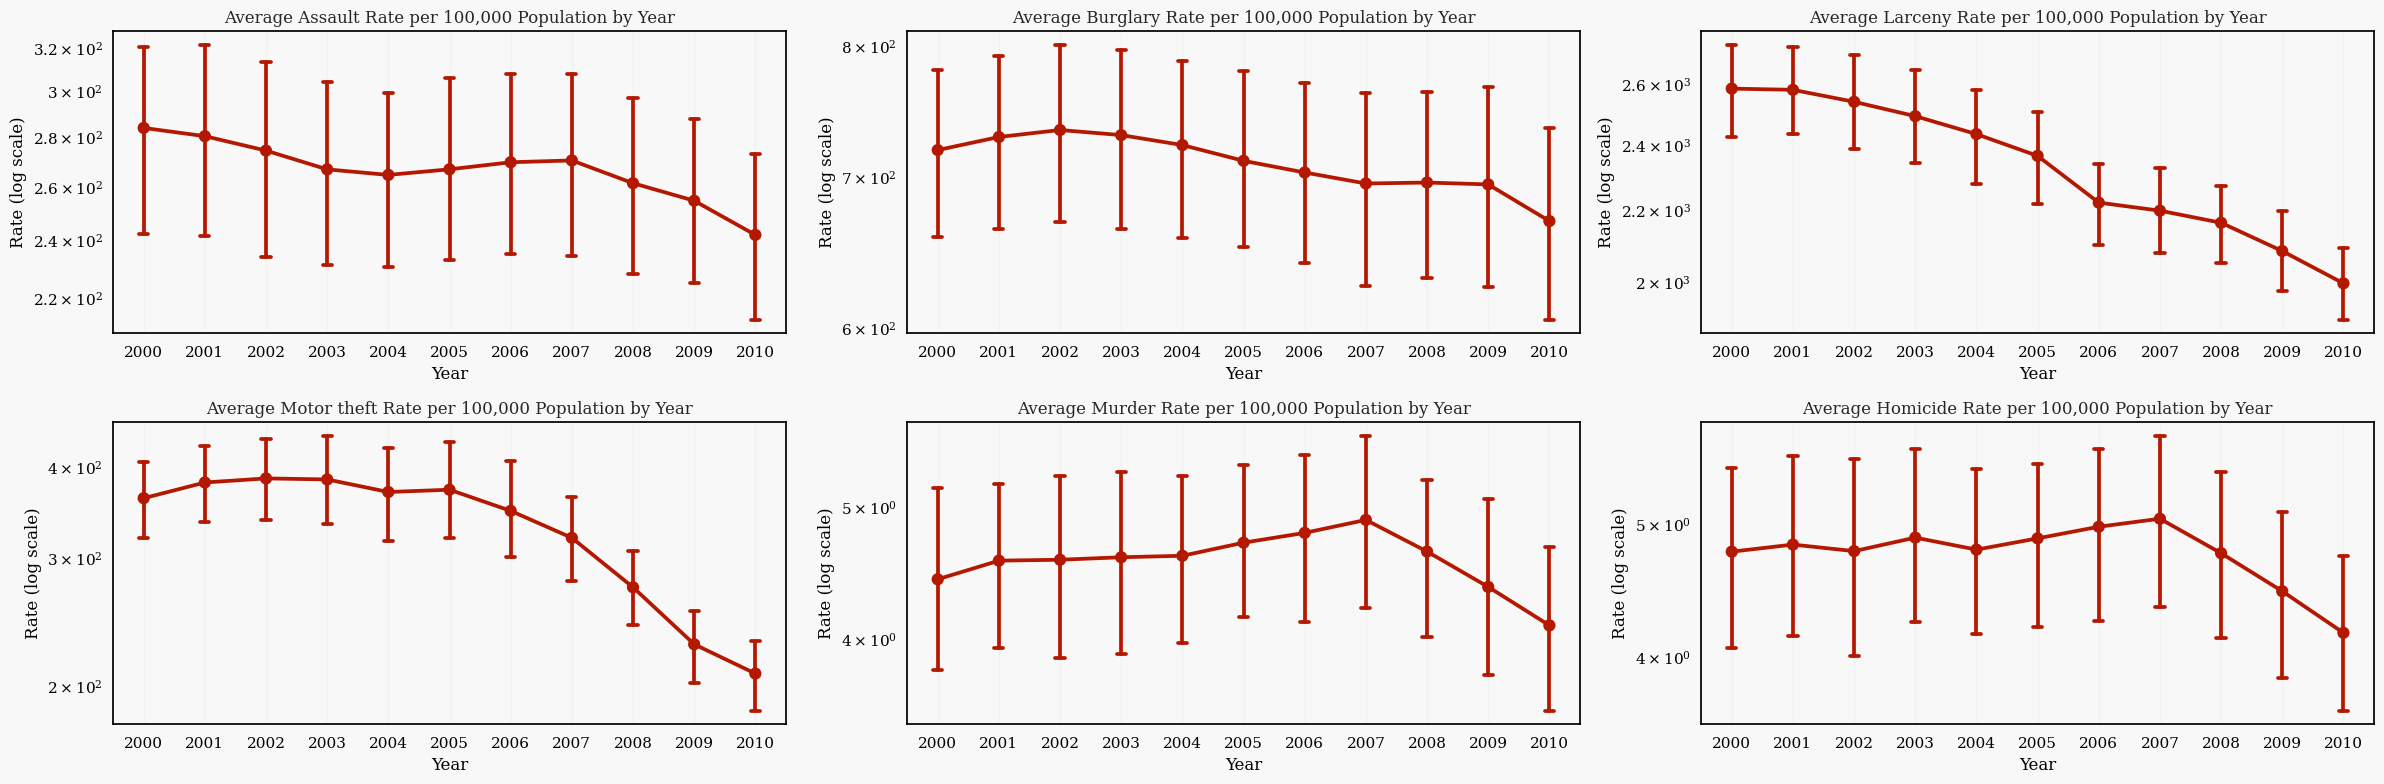

In [119]:
castle_data = castle.copy()

# Selecting relevant columns for plotting
plot_data = castle_data[['year', 'assault', 'burglary', 'larceny', 'motor', 'murder', 'homicide']]

# Melting the data for seaborn catplot
plot_data_melted = plot_data.melt(id_vars=['year'], var_name='Crime Type', value_name='Rate')

# Separate data for each crime type
assault_data = plot_data_melted[plot_data_melted['Crime Type'] == 'assault']
burglary_data = plot_data_melted[plot_data_melted['Crime Type'] == 'burglary']
larceny_data = plot_data_melted[plot_data_melted['Crime Type'] == 'larceny']
motor_data = plot_data_melted[plot_data_melted['Crime Type'] == 'motor']
murder_data = plot_data_melted[plot_data_melted['Crime Type'] == 'murder']
homicide_data = plot_data_melted[plot_data_melted['Crime Type'] == 'homicide']

# Creating a single figure with three subplots
fig, axes = plt.subplots(2, 3, figsize=(24, 8))  

# Assault Plot
sns.pointplot(x='year', y='Rate', data=assault_data, color='#b51800', capsize=0.15, ax=axes[0][0])
axes[0][0].set_title('Average Assault Rate per 100,000 Population by Year')
axes[0][0].set_yscale('log')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Rate (log scale)')
axes[0][0].grid(True)

# Burglary Plot
sns.pointplot(x='year', y='Rate', data=burglary_data, color='#b51800', capsize=0.15, ax=axes[0][1])
axes[0][1].set_title('Average Burglary Rate per 100,000 Population by Year')
axes[0][1].set_yscale('log')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Rate (log scale)')
axes[0][1].grid(True)

# Larceny Plot
sns.pointplot(x='year', y='Rate', data=larceny_data, color='#b51800', capsize=0.15, ax=axes[0][2])
axes[0][2].set_title('Average Larceny Rate per 100,000 Population by Year')
axes[0][2].set_yscale('log')
axes[0][2].set_xlabel('Year')
axes[0][2].set_ylabel('Rate (log scale)')
axes[0][2].grid(True)

# Motor theft Plot
sns.pointplot(x='year', y='Rate', data=motor_data, color='#b51800', capsize=0.15, ax=axes[1][0])
axes[1][0].set_title('Average Motor theft Rate per 100,000 Population by Year')
axes[1][0].set_yscale('log')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Rate (log scale)')
axes[1][0].grid(True)

# Murder Plot
sns.pointplot(x='year', y='Rate', data=murder_data, color='#b51800', capsize=0.15, ax=axes[1][1])
axes[1][1].set_title('Average Murder Rate per 100,000 Population by Year')
axes[1][1].set_yscale('log')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Rate (log scale)')
axes[1][1].grid(True)

# Homicide Plot
sns.pointplot(x='year', y='Rate', data=homicide_data, color='#b51800', capsize=0.15, ax=axes[1][2])
axes[1][2].set_title('Average Homicide Rate per 100,000 Population by Year')
axes[1][2].set_yscale('log')
axes[1][2].set_xlabel('Year')
axes[1][2].set_ylabel('Rate (log scale)')
axes[1][2].grid(True)

plt.tight_layout()  # Adjusts the subplots to fit into the figure area
plt.show()

The trends suggest that on average, the rate of these crimes appears to decline after around 2006-2007, but we know that some states adopted the new law, and some states didnt't and futhermore, we know that they did not adopt it at the same time. 

We should have an overview of which states implemented the castle doctrine laws (treatment), and when they adopted it between 2000 and 2010, and which didn't (control).

In [120]:
control = castle.groupby('sid').filter(lambda x: x['post'].sum() == 0)
treatment = castle.groupby('sid').filter(lambda x: x['post'].sum() > 0)

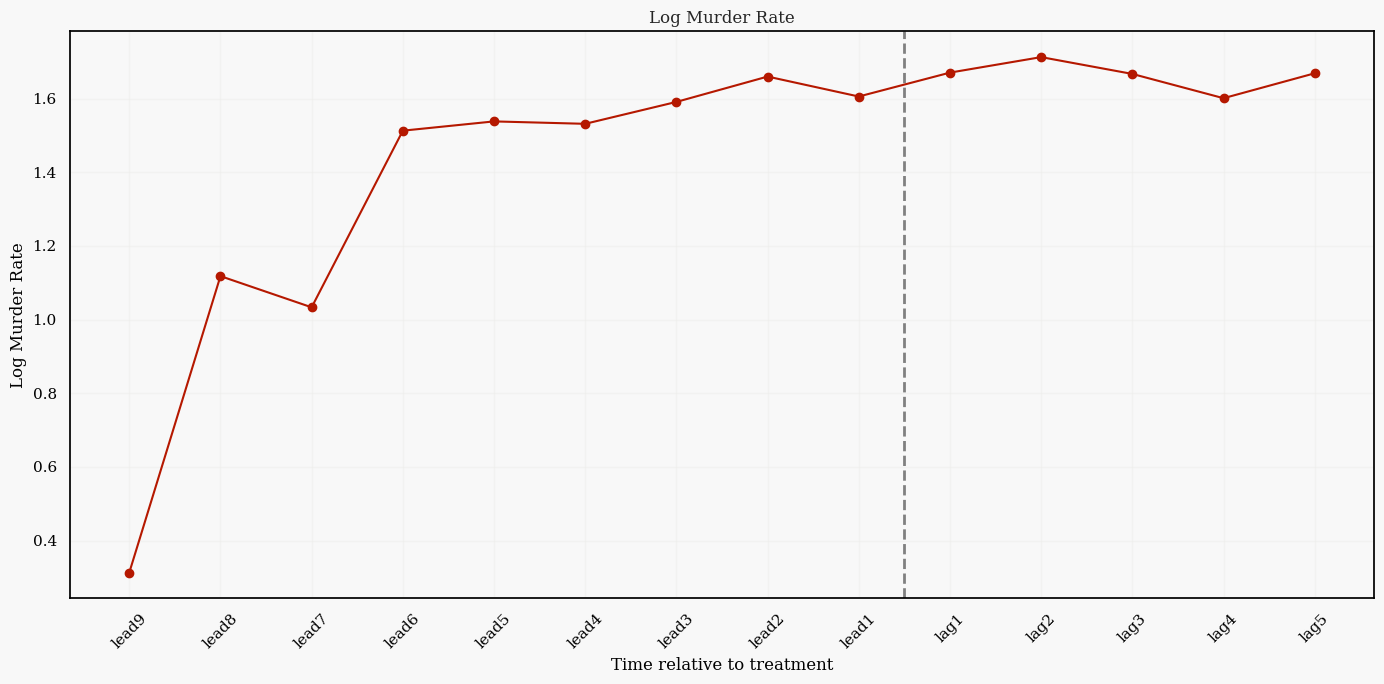

In [121]:
# Checking if 'l_murder' exists in the columns
if 'l_murder' in treatment.columns:
    log_murder_rate = treatment['l_murder']
else:
    # If 'l_murder' doesn't exist, we'll calculate the log murder rate assuming 'murder' is the murder count per 100,000 state population
    # The log of 0 is undefined, so we'll replace any 0 murder counts with a small number (1e-6) before taking the log to avoid -inf values
    log_murder_rate = np.log(treatment['murder'].replace(0, 1e-6))

# Extracting lead and lag columns for the x-axis
leads_lags_columns = ['lead9', 'lead8', 'lead7', 'lead6', 'lead5', 'lead4', 'lead3', 'lead2', 'lead1',
                      'lag1', 'lag2', 'lag3', 'lag4', 'lag5']
leads_lags_data = treatment[leads_lags_columns]

# Now, let's plot the log murder rate for the treatment states
import matplotlib.pyplot as plt

# Since we want to plot one point per lead/lag, we should aggregate the log murder rates for all treatment states by these variables
# We can take the mean of the log murder rates for each lead/lag
mean_log_murder_rates = leads_lags_data.apply(lambda x: log_murder_rate[x.astype(bool)].mean(), axis=0)

# Plotting the log murder rate
plt.figure(figsize=(14, 7))
plt.errorbar(x=mean_log_murder_rates.index, y=mean_log_murder_rates.values, fmt='o', linestyle='-', color='#b51800')
plt.title('Log Murder Rate')
plt.xlabel('Time relative to treatment')
plt.ylabel('Log Murder Rate')
plt.axvline(8.5, color='grey', lw=2, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's obvserve the state distribution of the time relative to treatment.

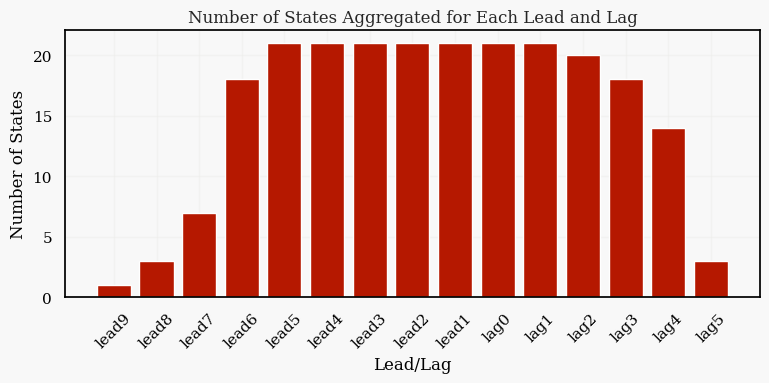

In [122]:
leads_lags_count = {}
for col in list(reversed(['lead1', 'lead2', 'lead3', 'lead4', 'lead5', 'lead6', 'lead7', 'lead8', 'lead9'])) + ['lag0', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5']:
    leads_lags_count[col] = treatment[treatment[col] == True]['sid'].nunique()

# Creating a DataFrame from the dictionary for plotting
leads_lags_count_df = pd.DataFrame(list(leads_lags_count.items()), columns=['Time relative to treatment', 'Number of States'])

# Plotting the bar plot
plt.figure(figsize=(8, 4))
barplot = plt.bar(leads_lags_count_df['Time relative to treatment'], leads_lags_count_df['Number of States'], color='#b51800')
plt.title('Number of States Aggregated for Each Lead and Lag')
plt.xlabel('Lead/Lag')
plt.ylabel('Number of States')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [123]:
display(stylize_simple(leads_lags_count_df, caption='State distribution of relative time before and after treatment'))

,Time relative to treatment,Number of States
0,lead9,1
1,lead8,3
2,lead7,7
3,lead6,18
4,lead5,21
5,lead4,21
6,lead3,21
7,lead2,21
8,lead1,21
9,lag0,21


Eight to nine years prior to treatment, treatment states have significantly lower levels of homicides, but as there are so few states that even have these values (1 state for 9 and 3 for 8), we may want to disregard the relevance of these negative effects. Same could also apply to the 5 years after treatment. Let's visualize a some comparisons between treated and control groups. 

In [152]:
# Countries that are treated
treatment_countries = treatment['sid'].map(STATE_ID_TO_STATE_NAME).unique()
treatment_countries

array(['Alabama', 'Alaska', 'Arizona', 'Florida', 'Georgia', 'Indiana',
       'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Montana', 'North Dakota', 'Ohio', 'Oklahoma',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'West Virginia'], dtype=object)

In [157]:
def plot_control_vs_treated(treated_state_name, crime, title, y_label):
    sid = STATE_NAME_TO_STATE_ID[treated_state_name] 
    year_treated = treatment.loc[(treatment.sid == sid) & (treatment.post == 1)].iloc[0]['year'].astype(int) - 1
    plt.figure(figsize=(10, 6))
    plt.axvline(year_treated, color='grey', lw=2, linestyle='--')
    plt.plot(treatment.loc[(treatment.sid == sid)].groupby('year')[crime].mean(), marker='o', linestyle='--', color='black', label=f"Treatment: {treated_state_name} (law enacted in {year_treated})")
    plt.plot(control.groupby('year')[crime].mean(), marker='o', linestyle='--', color='#b51800', label='Control Group (never treated)')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(y_label)
    plt.xticks(range(2000, 2011))
    plt.grid(True)
    plt.legend()
    plt.show()

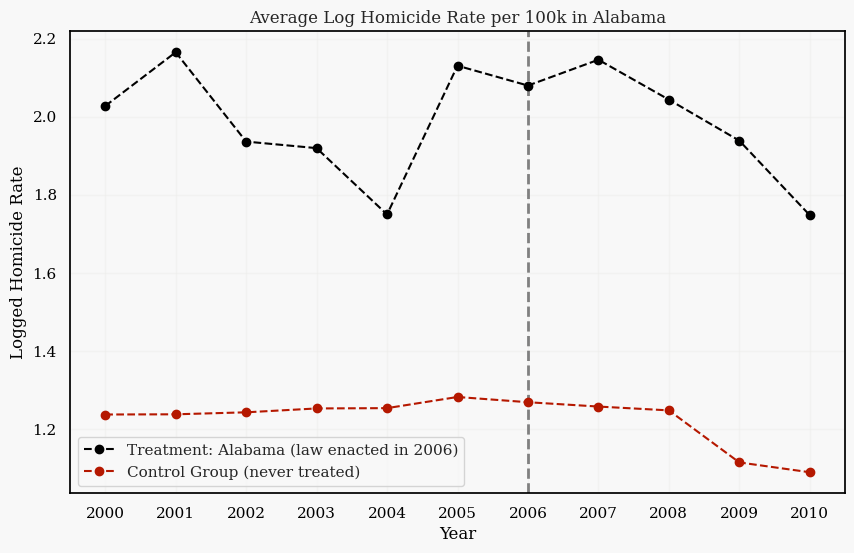

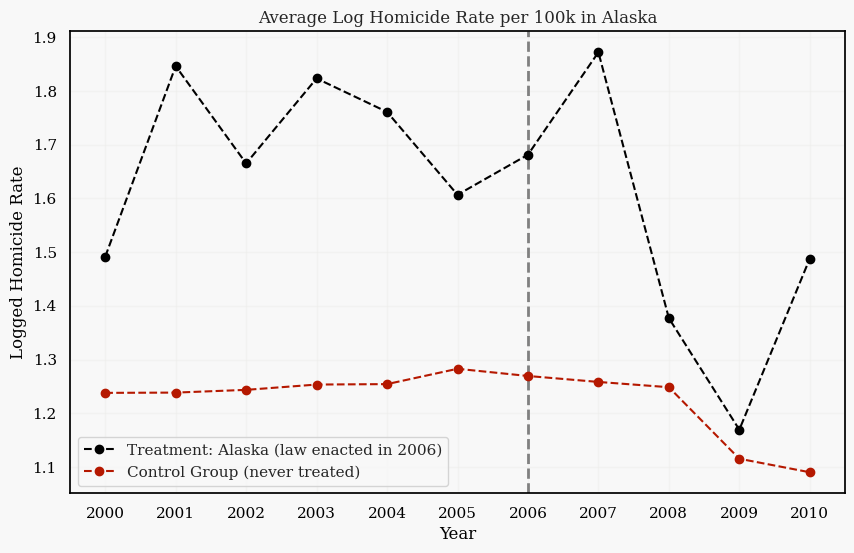

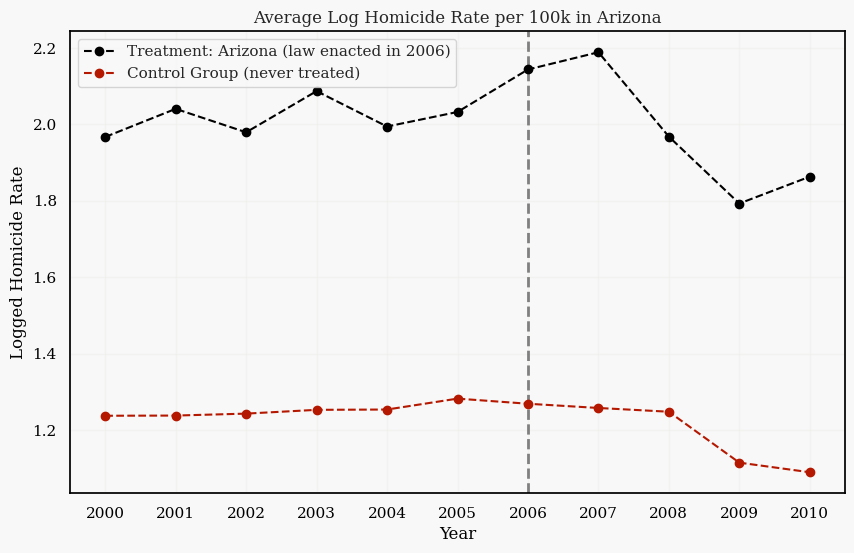

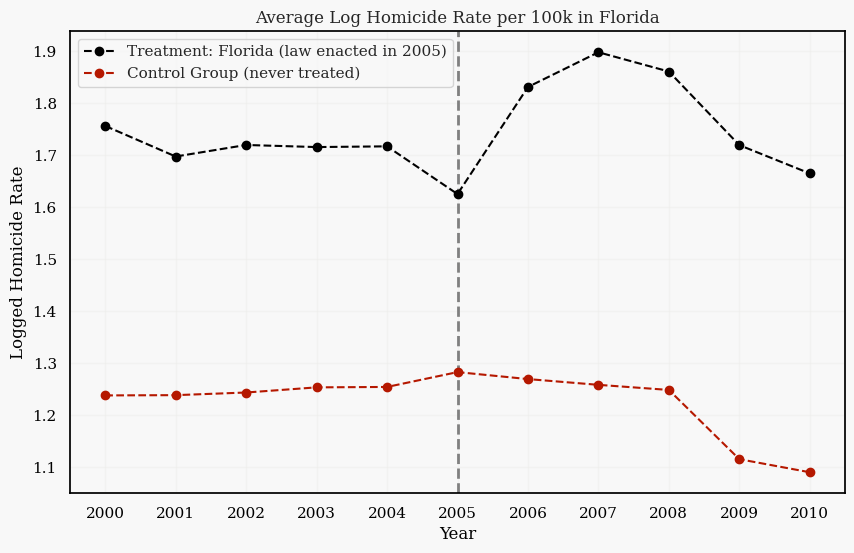

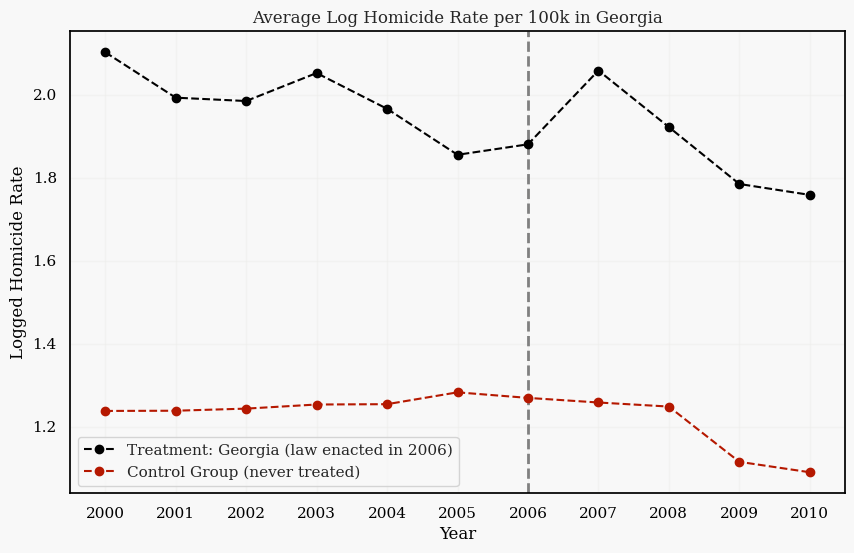

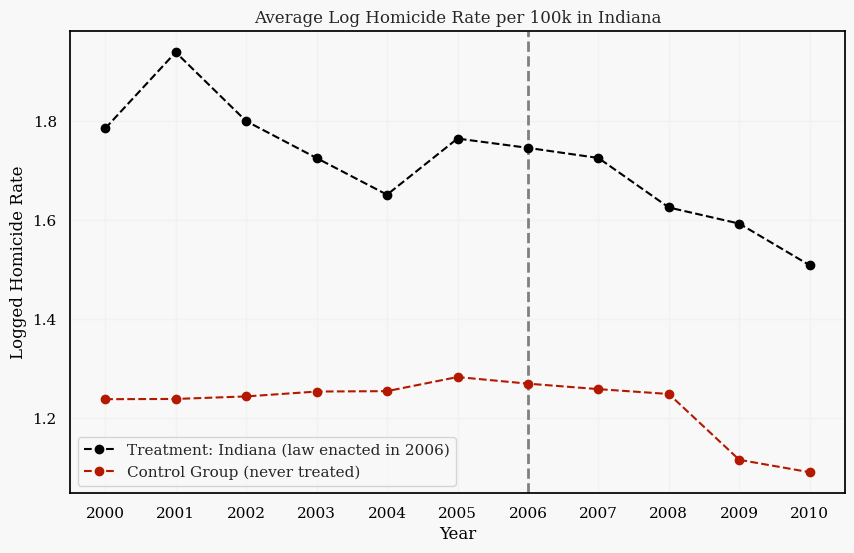

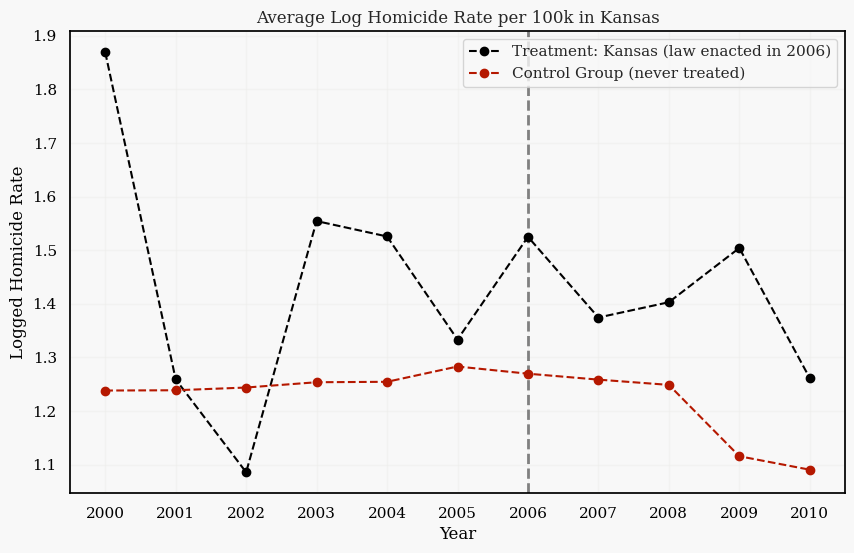

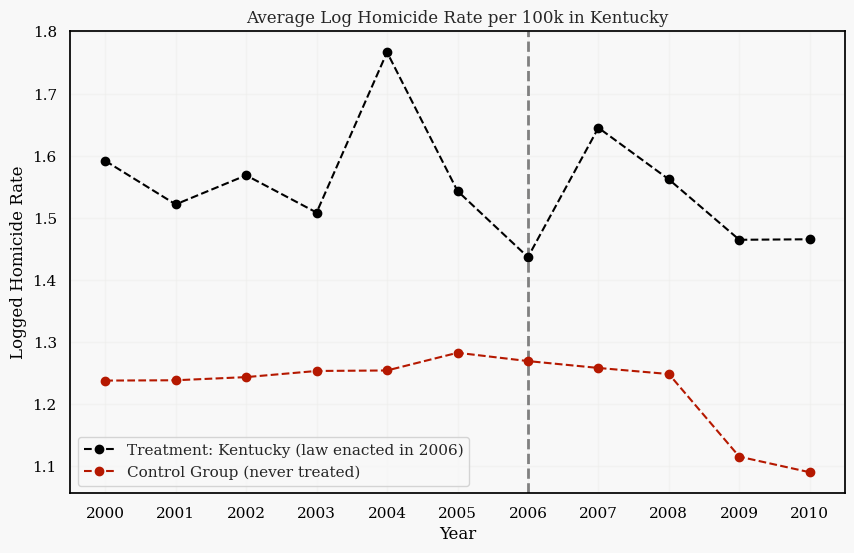

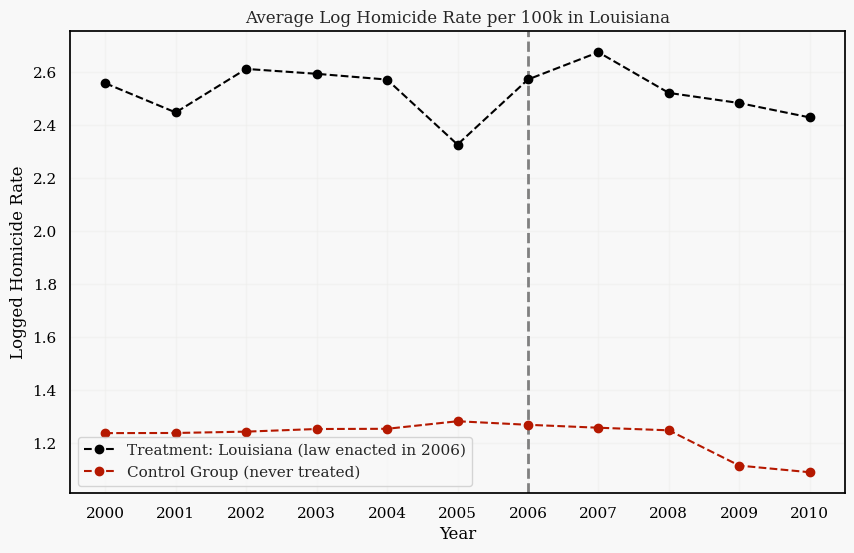

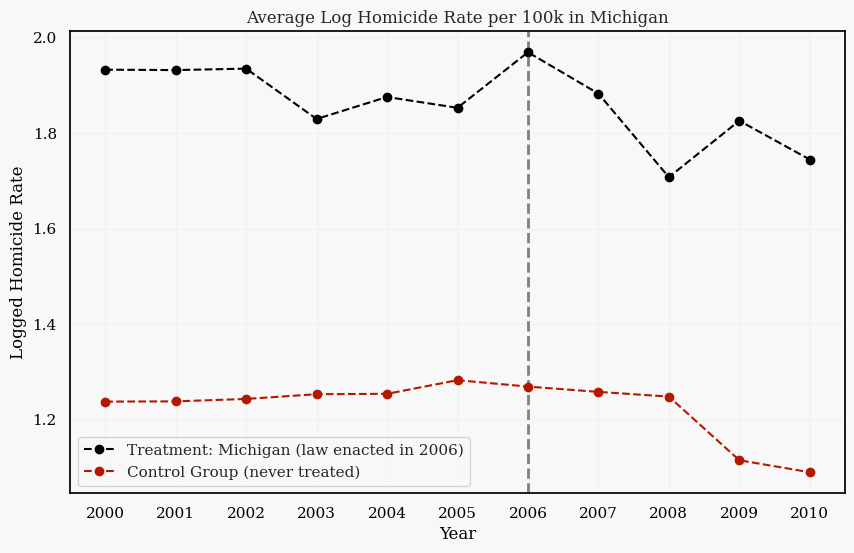

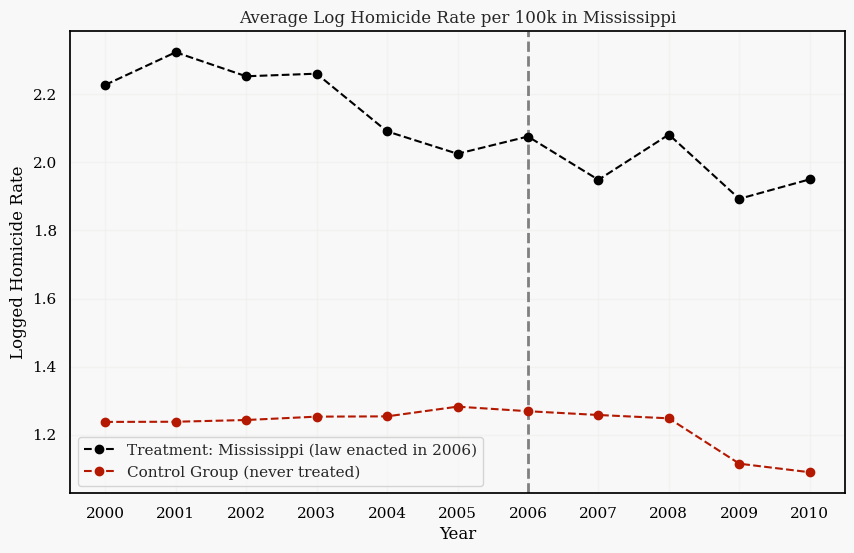

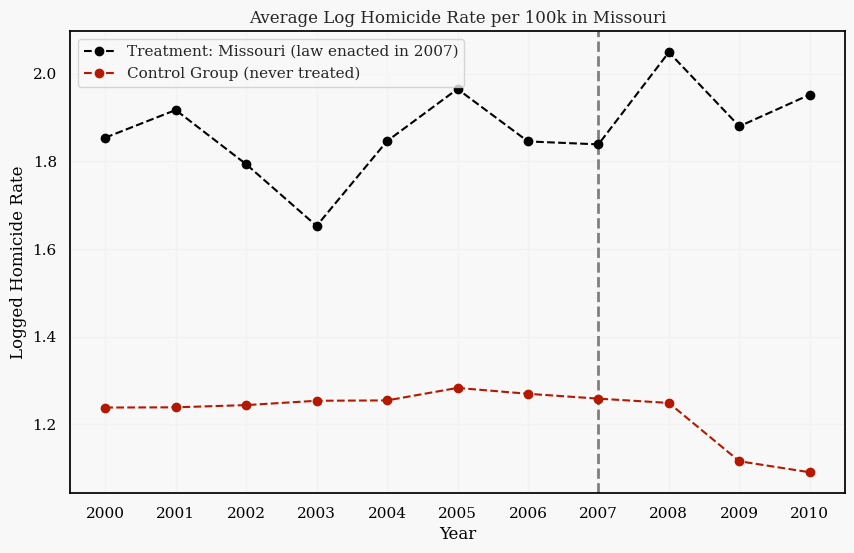

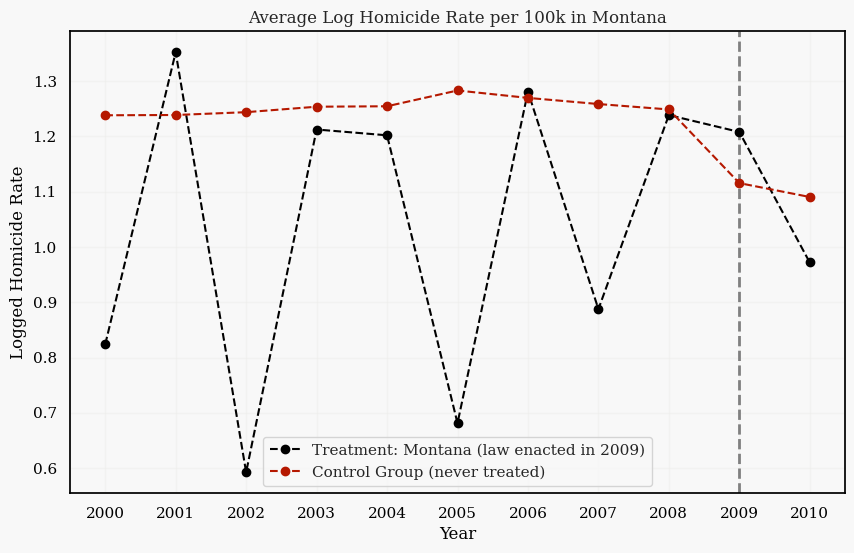

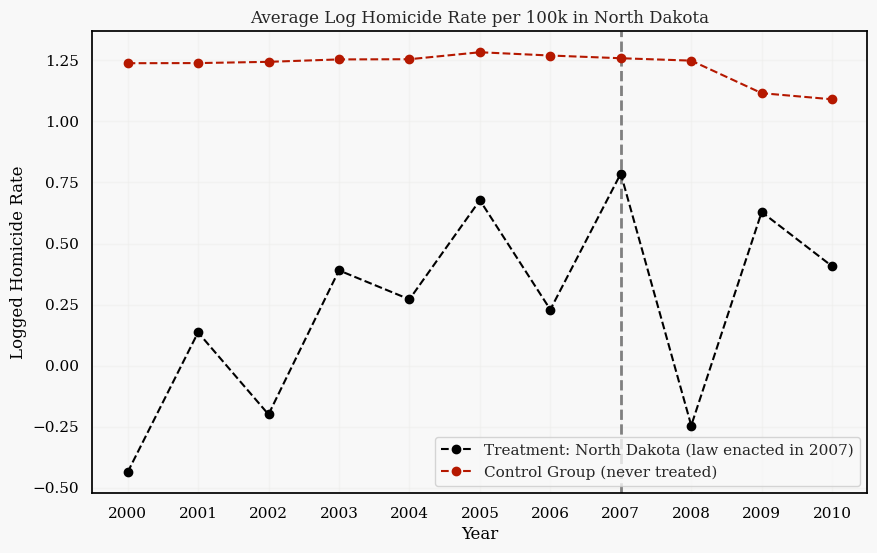

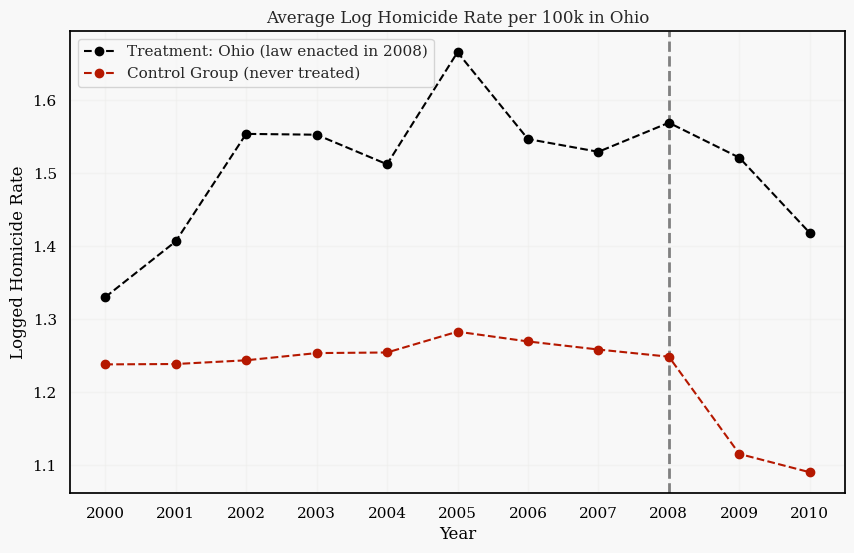

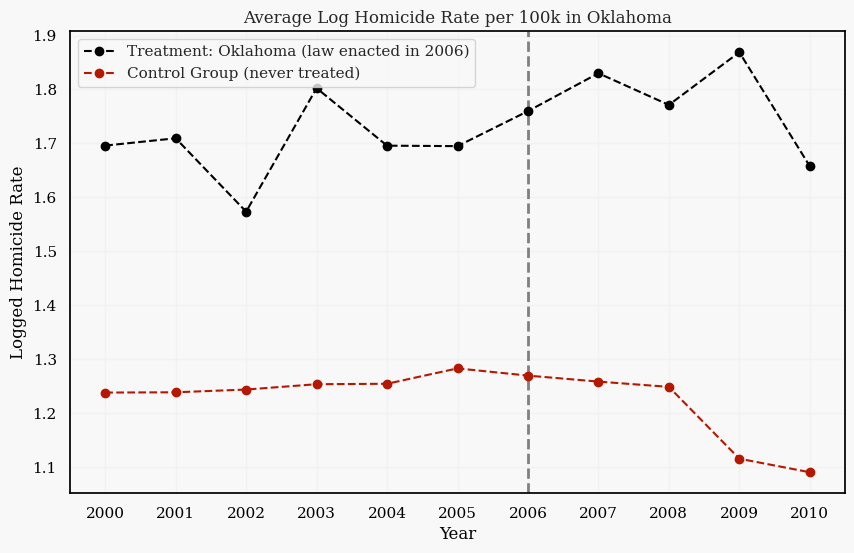

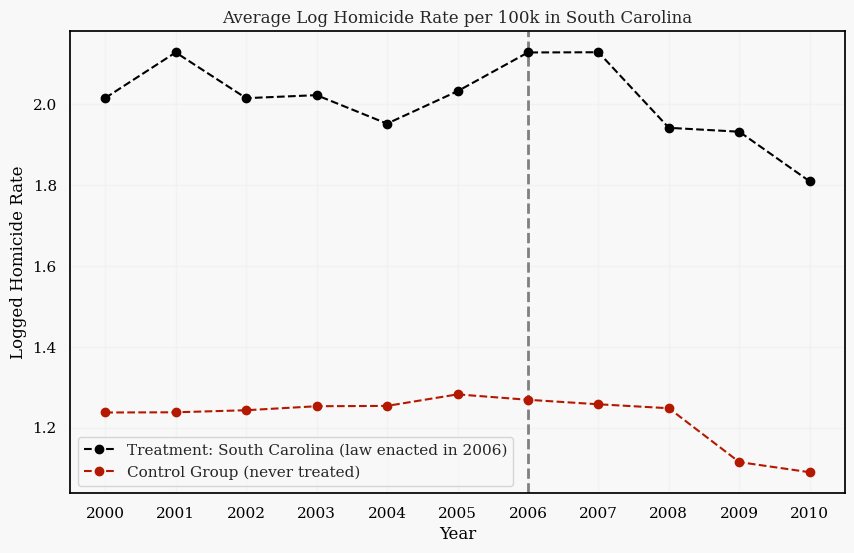

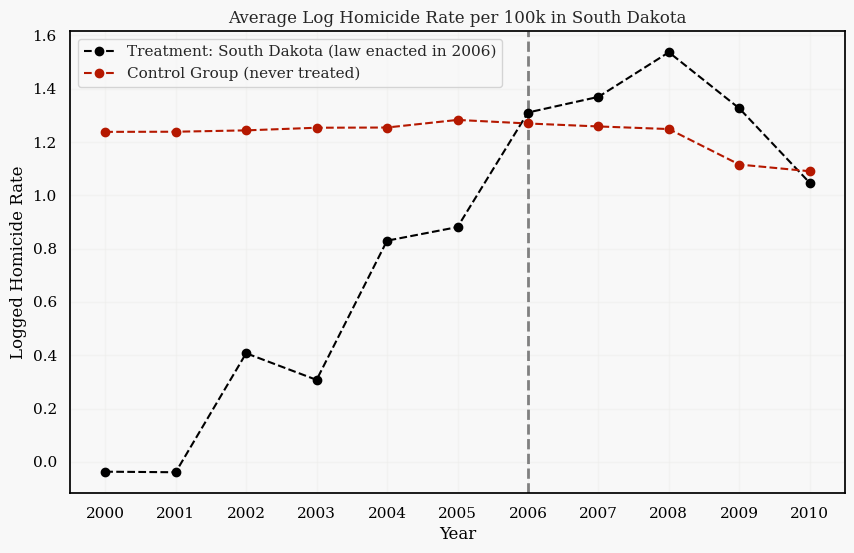

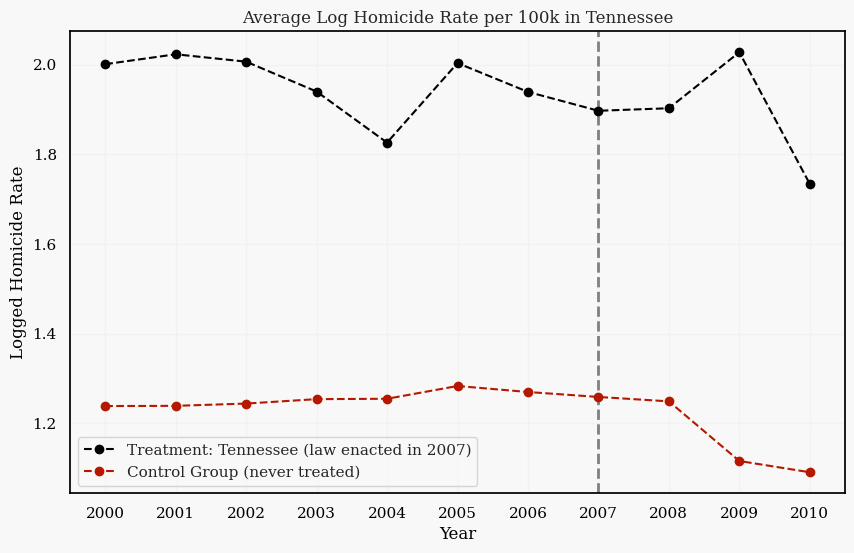

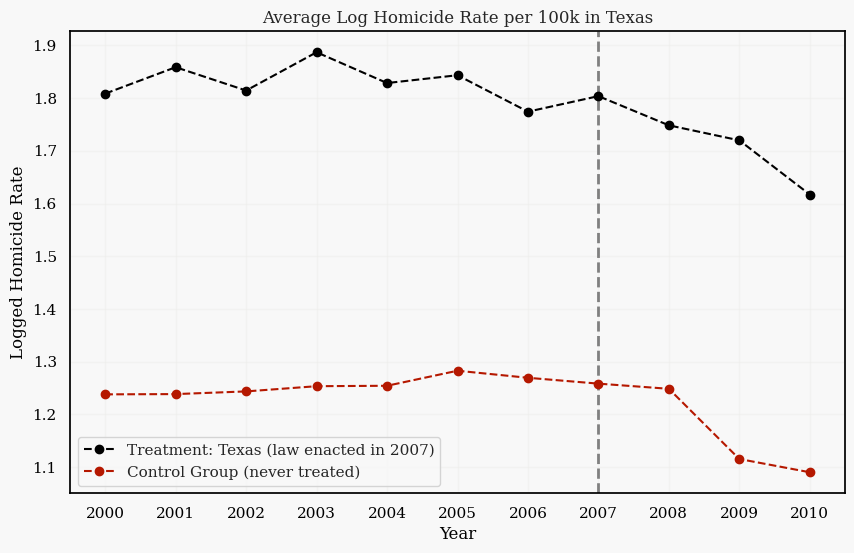

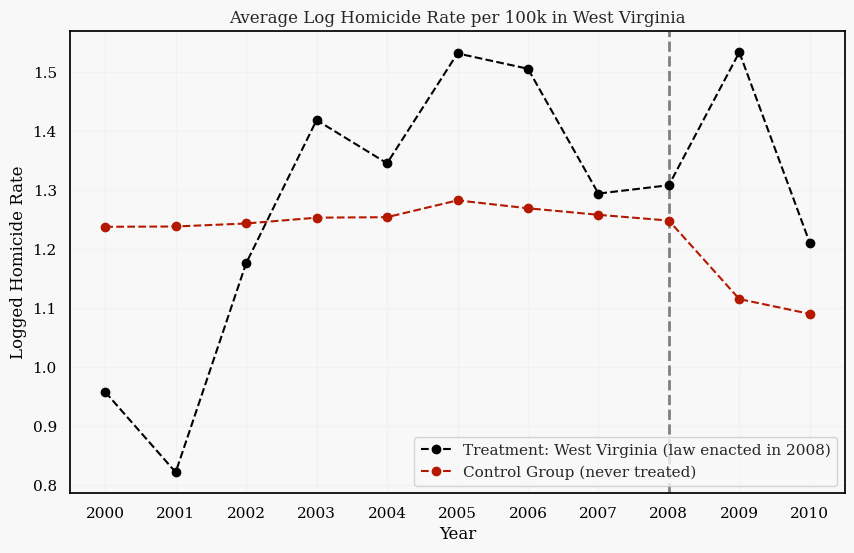

In [158]:
for country in treatment_countries:
    plot_control_vs_treated(country, 'l_homicide', f'Average Log Homicide Rate per 100k in {country}', 'Logged Homicide Rate')

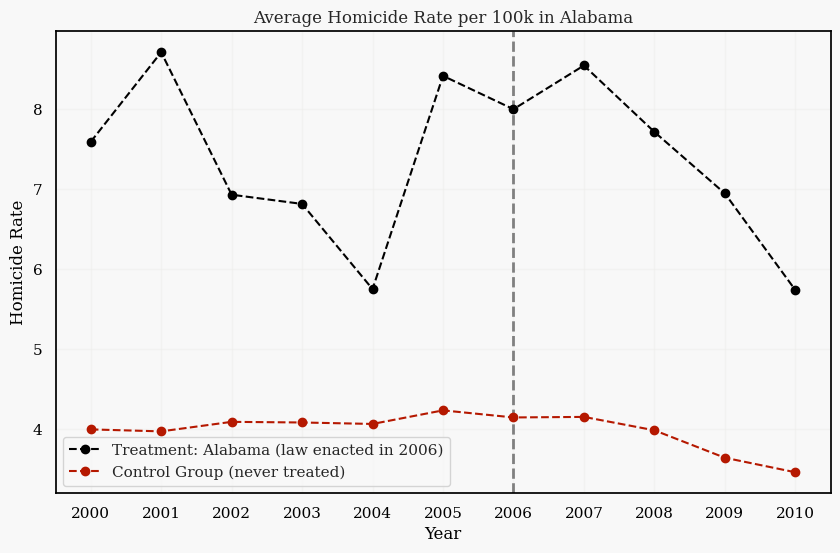

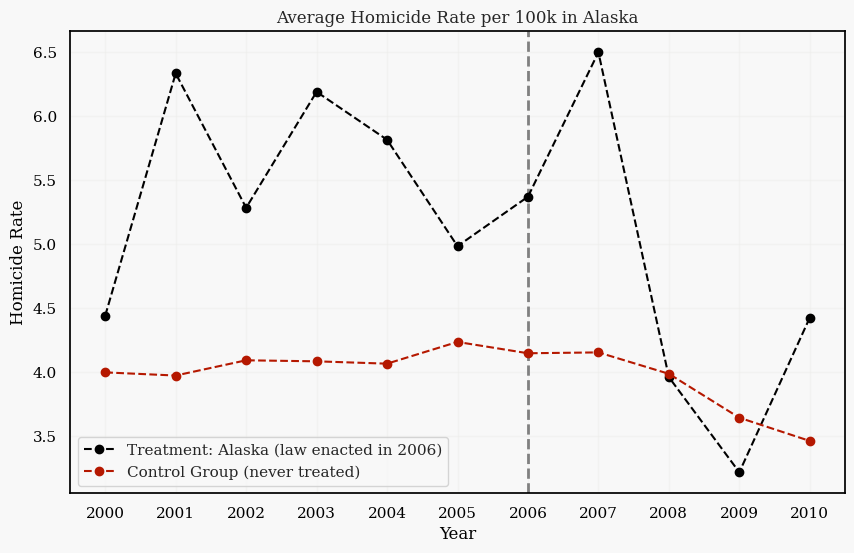

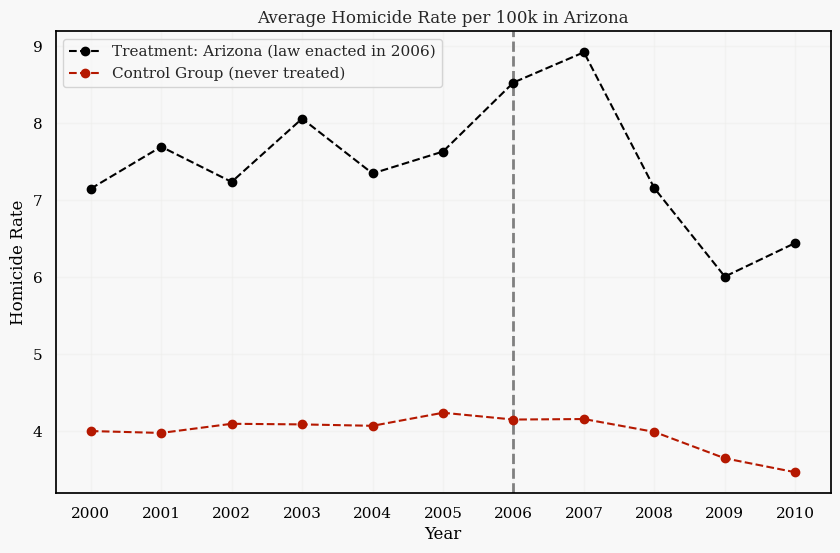

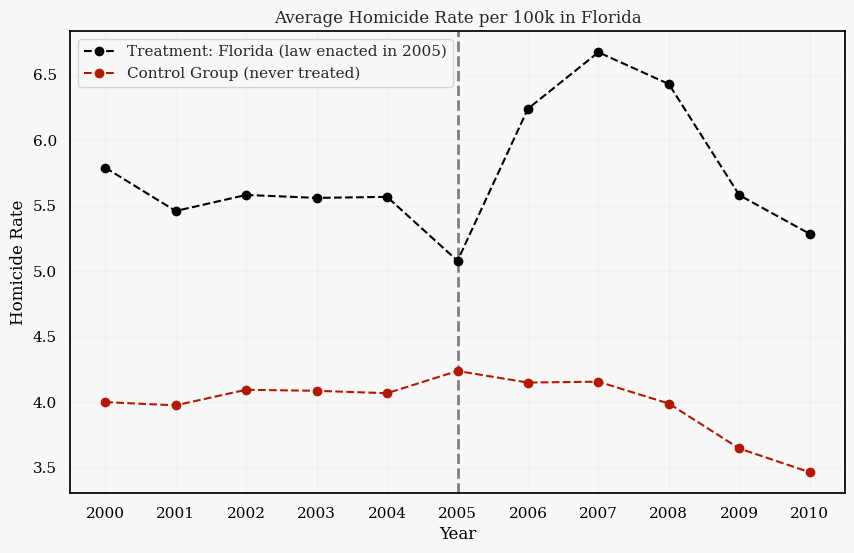

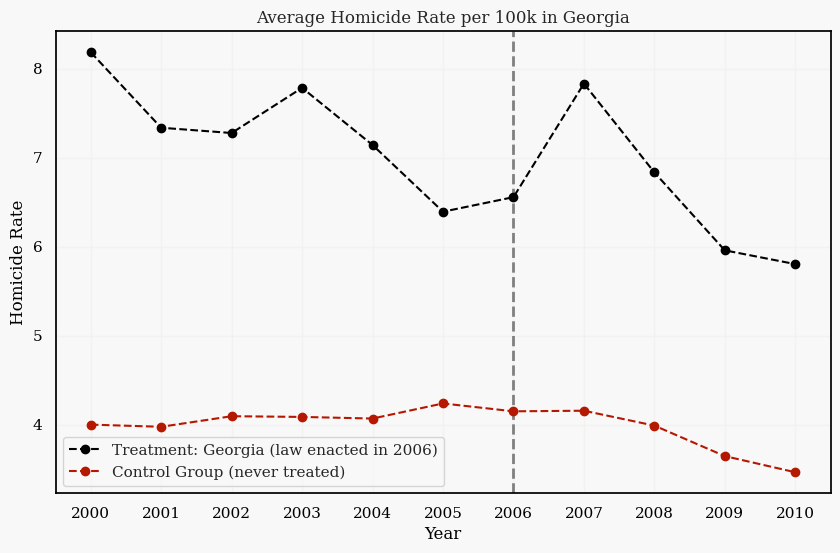

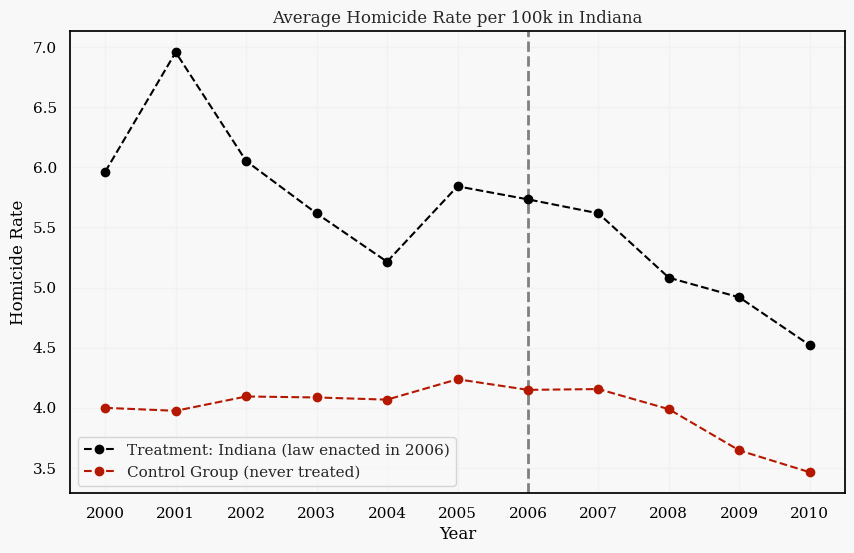

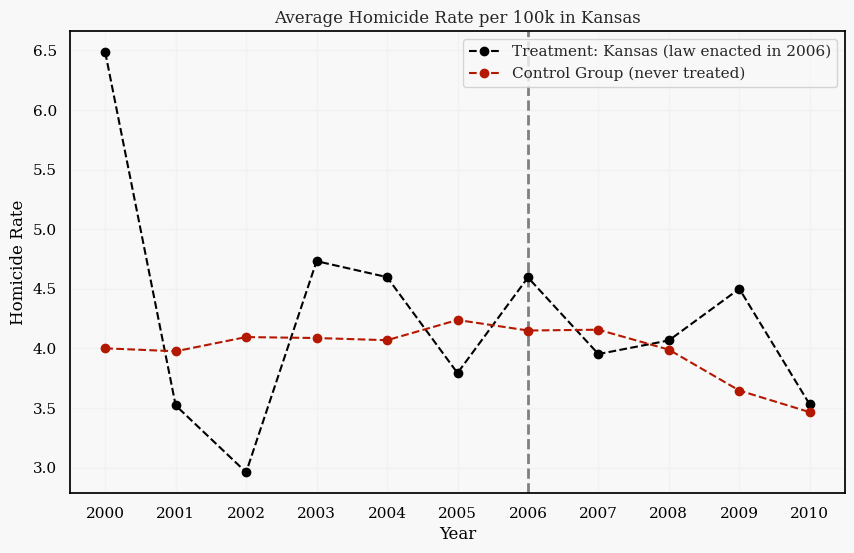

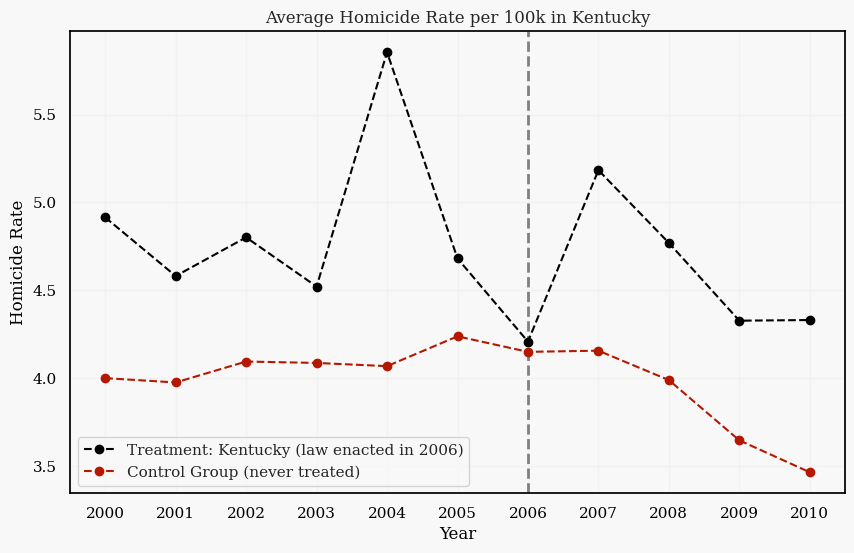

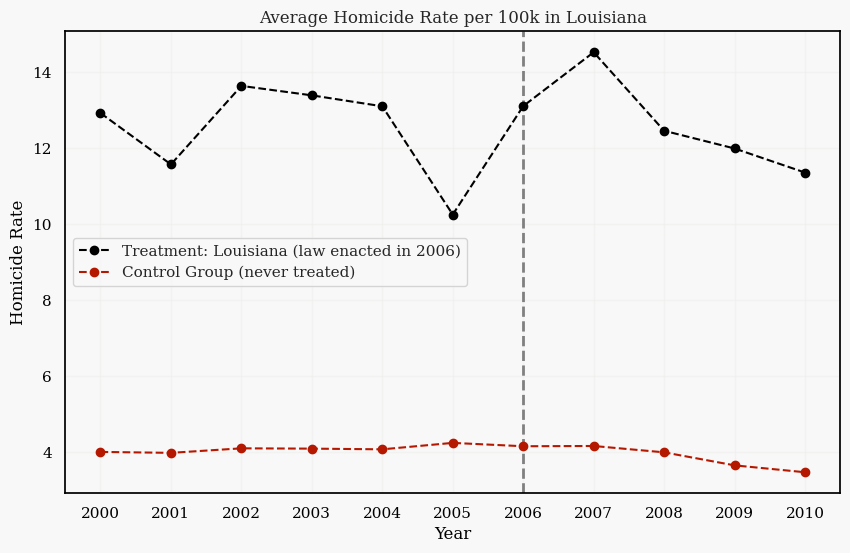

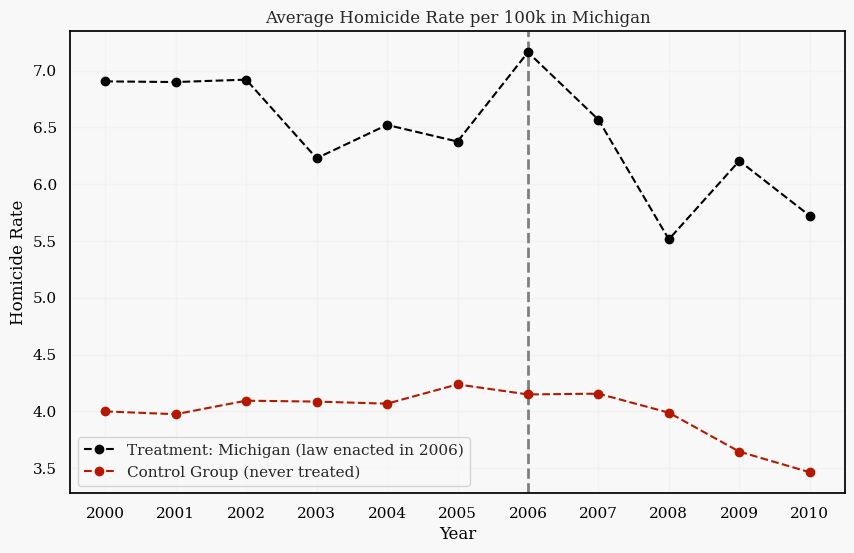

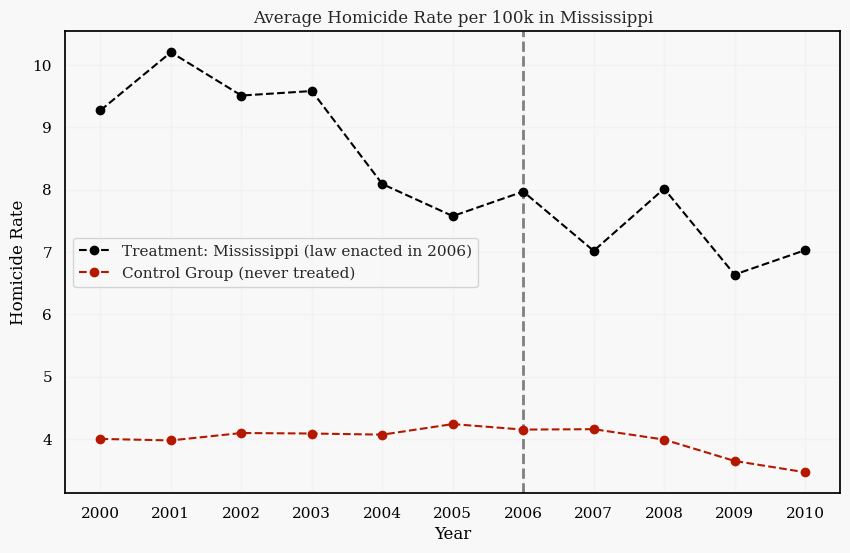

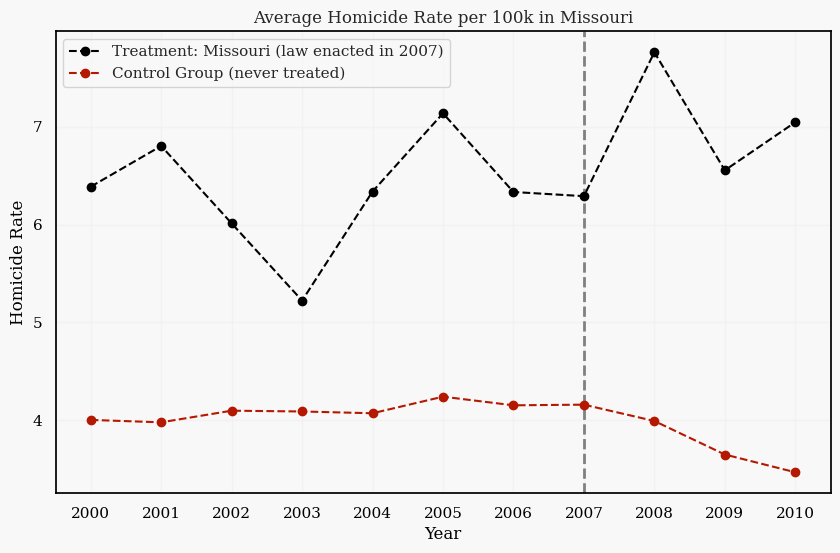

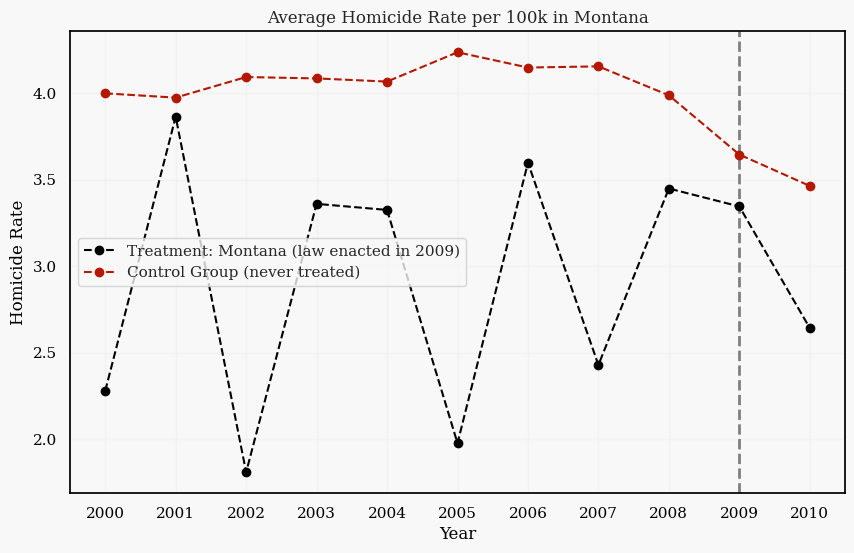

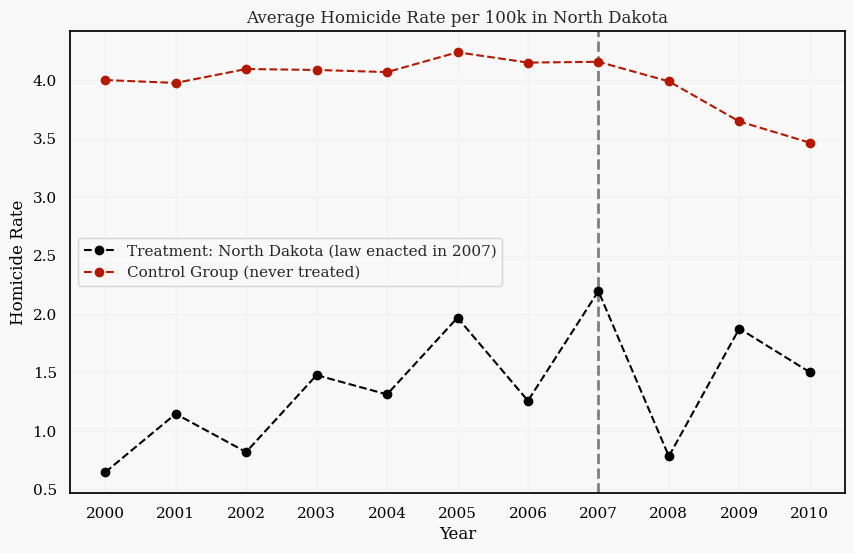

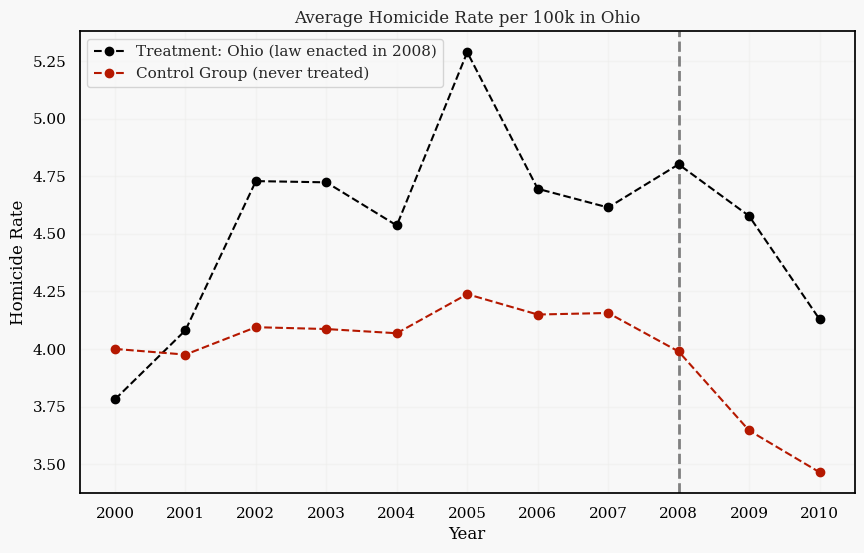

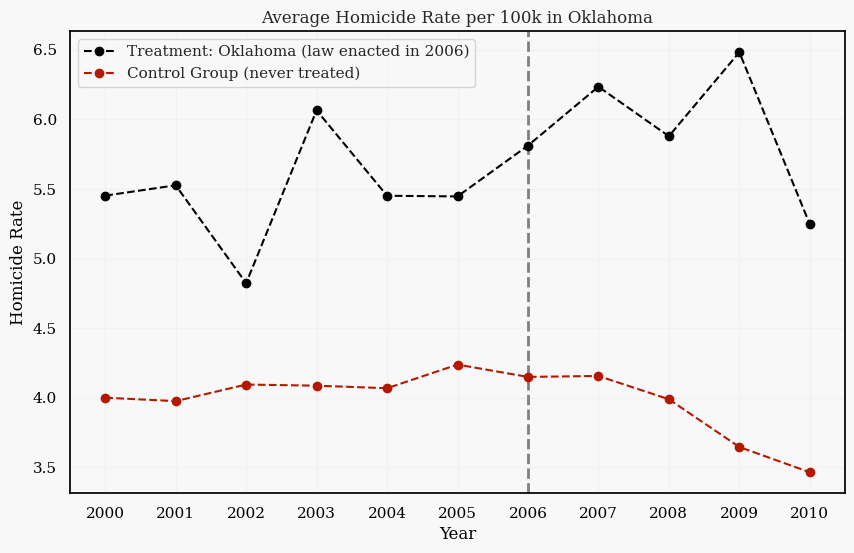

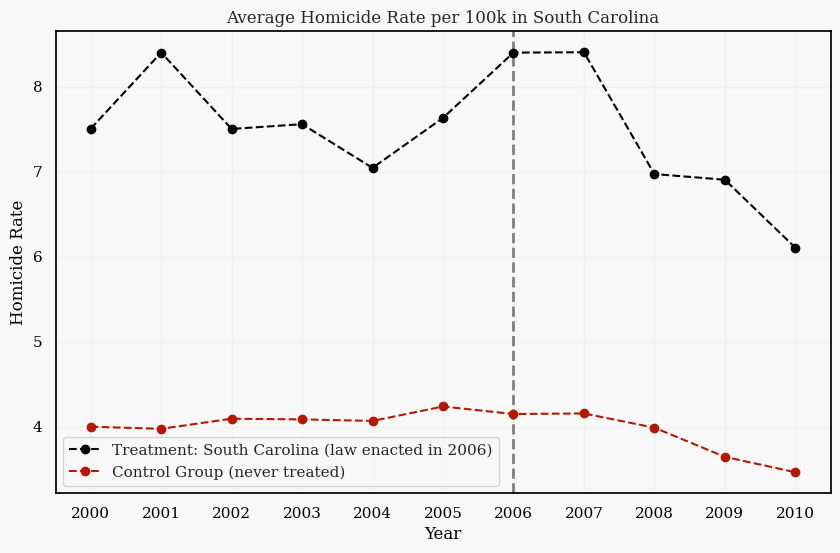

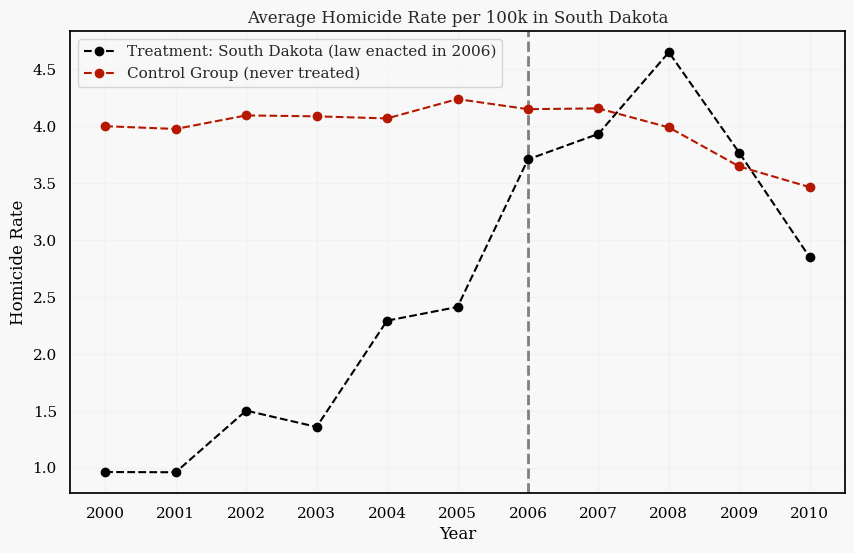

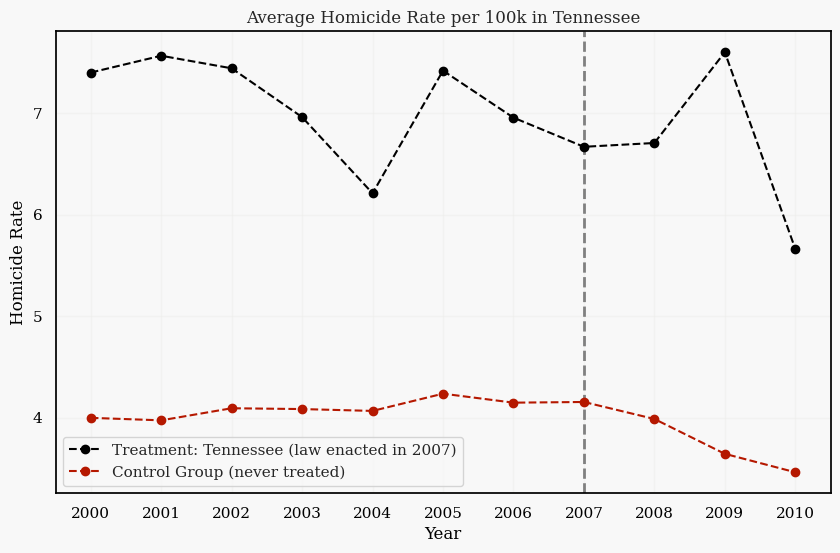

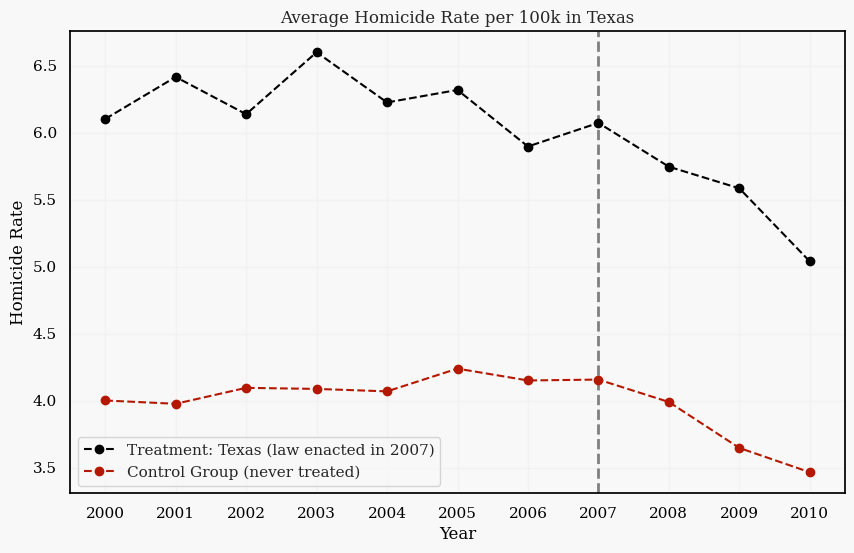

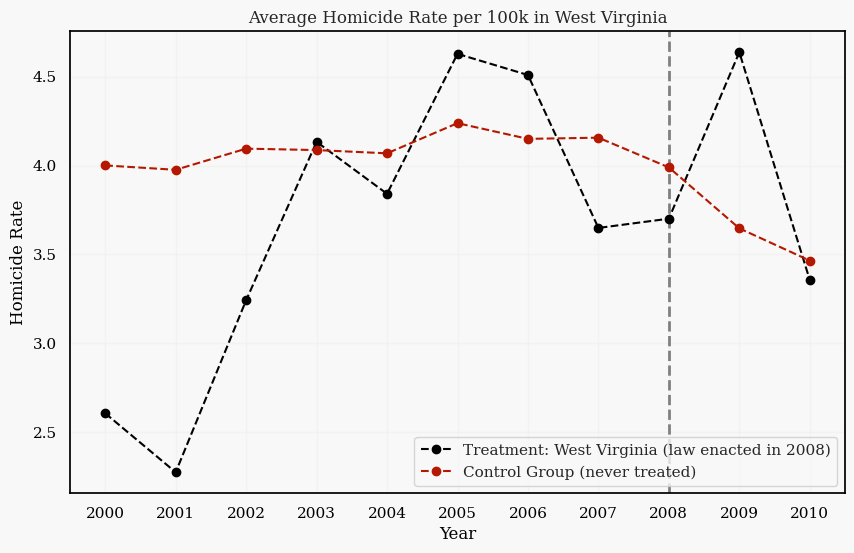

In [160]:
for country in treatment_countries:
    plot_control_vs_treated(country, 'homicide', f'Average Homicide Rate per 100k in {country}', 'Homicide Rate')

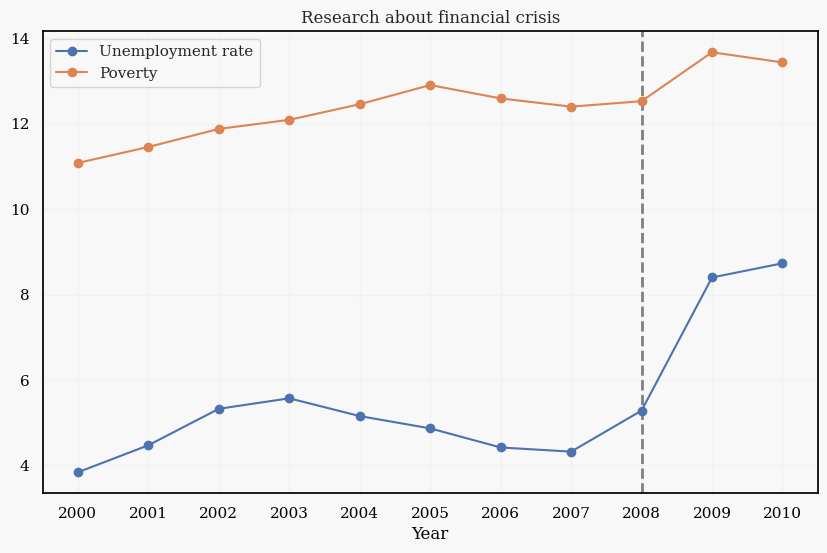

In [166]:
plt.figure(figsize=(10, 6))
plt.axvline(2008, color='grey', lw=2, linestyle='--')
# plt.plot(castle_data.groupby('year')['l_exp_pubwelfare'].mean(), marker='o', linestyle='-', label='Spent public welfare')
# plt.plot(castle_data.groupby('year')['l_exp_subsidy'].mean(), marker='o', linestyle='-', label='Spent public subsidy')
plt.plot(castle_data.groupby('year')['unemployrt'].mean(), marker='o', linestyle='-', label='Unemployment rate')
plt.plot(castle_data.groupby('year')['poverty'].mean(), marker='o', linestyle='-', label='Poverty')
plt.title("Research about financial crisis")
plt.xlabel('Year')
plt.xticks(range(2000, 2011))
plt.grid(True)
plt.legend()
plt.show()

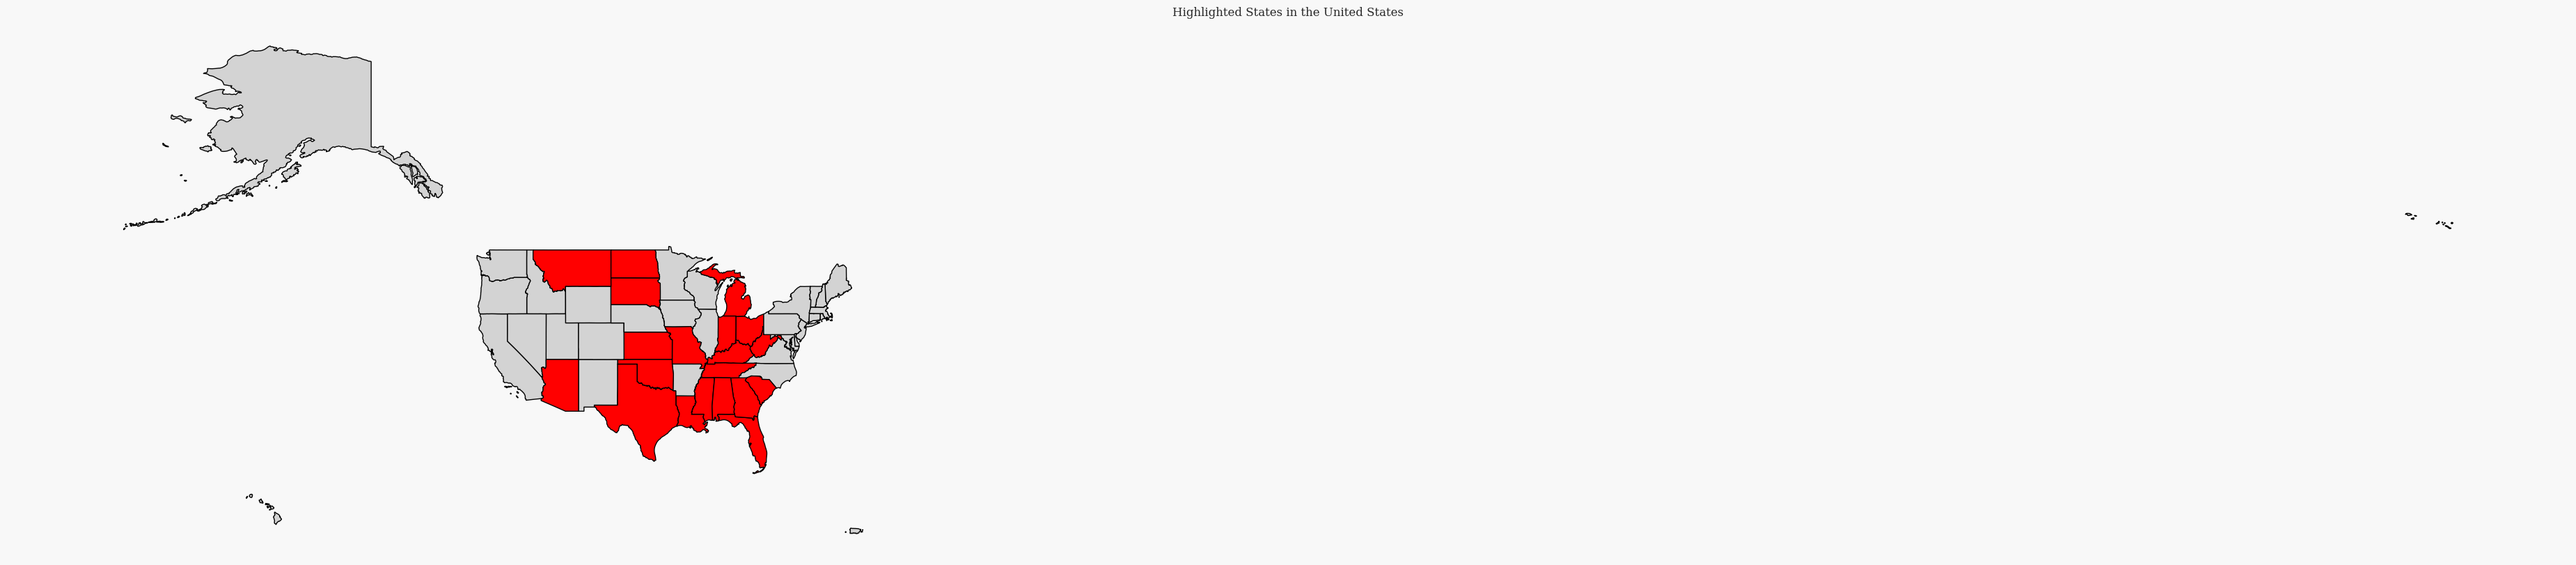

In [174]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the map of United States
us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_map = us_map[us_map['name'] == 'United States of America']

# States to be colored
states_to_color = ['Alabama', 'Arizona', 'Florida', 'Georgia', 'Indiana',
                   'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
                   'Missouri', 'Montana', 'North Dakota', 'Ohio', 'Oklahoma',
                   'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
                   'West Virginia']

# Loading US States geometries
us_states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

# Making sure that the state names match the format in the GeoDataFrame
us_states['NAME'] = us_states['NAME'].apply(lambda x: x.strip())

# Creating a new column for color coding
us_states['color'] = us_states['NAME'].apply(lambda x: 'red' if x in states_to_color else 'lightgrey')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(125, 10))
us_states.plot(ax=ax, color=us_states['color'], edgecolor='black')
ax.set_title('Highlighted States in the United States')
ax.set_axis_off()
plt.show()
